## ЛУ 5: Увод във визуализацията на данни с matplotlib

Най-ефикасният начин да наблюдаваме информацията от даден набор данни непосредствено е чрез визуализации. Независимо дали представяте резултати от анализ пред мениджмънт или пък се опитвате да диагностицирате собствен алгоритъм, визуализираните данни са завършени данни: те са най-лесният мост между сложността на масива числа и/ или низове, с който разполагаме, и начина, по който нашият мозък възприема реалността.

Визуализирането на данни е сложна сфера само по себе си и немалко хора изкарват целите си кариери в тази сфера. Читателят вероятно е запознат и с потребителско-насочени софтуерни решения за визуализация на данни, като Power BI или Tableau. Въпреки това, подобни решения често, улеснявайки процеса си, предотратяват възможността за прецизни, сложни и наслоени визуализации, които често са ключа към наистина високото ниво визуализиране на данни.

Предстоящите две упражнения са увод в една библиотека за Python, която, овладяна добре, позволява практически пълна свобода що се отнася до композицията на една визуализация. Библиотеката се нарича matplotlib. Макар представените тук визуализации да са относително прости, ще дадем на читателя инструментите да създава далеч по-сложни изображения.

За настоящето упражнение ще заредим наборите данни iris и healthexp. Iris съдържа стойности за дължина и ширина на близалцата (sepal) и листовете (petal) на три подвида (setosa, versicolor, virginica) растения от вида ирис (или перуника). Healthexp съдържа данни за здравния бюджет на 6 страни межди 1970 и 2020 и средната продължителност на живота там. Наборите са често използвани в обучение за работа с данни. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# зареждаме наборите данни от url адреси
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
dataset = 'healthexp'
url = f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{dataset}.csv'
healthexp = pd.read_csv(url)


Често можем да получим относително добра представа за даден набор от данни, описвайки колонките си статистически:

In [4]:
healthexp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


Въпреки това, не можем да включим горната таблица в презентация пред мениджмънт, а и освен това в нея няма твърде много детайл.

### Прости визуализации

#### Хистограма

Хистограмата е сред основните дескриптивни визуализации. Тя показва разпределението на данните ни групирани на равни интервали от стойности.

Най-лесният начин да създадем хистограма в Matplotlib е чрез функцията plt.hist(), където аргумент са данните, които искаме да визуализираме.

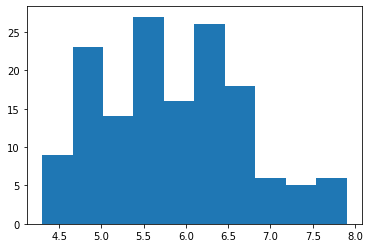

In [5]:
sample_histogram = plt.hist(iris.sepal_length)

Ако искаме да получим информация за възможните аргументи на дадена функция, можем да използваме въпросителна след нейното име (това работи за всички видове обекти), напр. 'plt.hist?'

#### Кръгова диаграма

Качествените променливи често се описват чрез кръгови диаграми (pie charts). Въпреки това, ако просто сложим променливата си като аргумент на функцията pie(), ще получим грешка:

Could not create visual because: could not convert string to float: 'setosa'


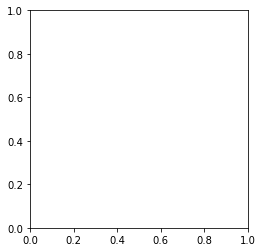

In [6]:
try:
    species_distribution = plt.pie(iris.species)
except Exception as e:
    print(f'Could not create visual because: {e}')

Това е защото функцията pie() приема за аргумент единични стойности на разпределение, които се извикват чрез познатата ни функция value_counts():

In [7]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

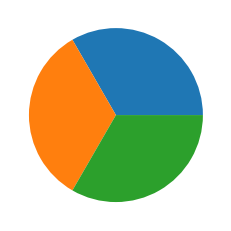

In [8]:
species_distribution = plt.pie(iris.species.value_counts())

Ако потърсим документацията на функцията ('plt.pie?'), ще открием, че имаме множество аругменти, които можем да използваме като параметри. В случая по-долу сме използвали ключовете на value_counts() (т.е. имената на всеки уникален случай: със същия успех бихме могли да използваме просто iris.species.unique()), за да отбележим коя част на диаграмата измерва определена стойност.

Text(0.5, 1.0, 'Species distribution')

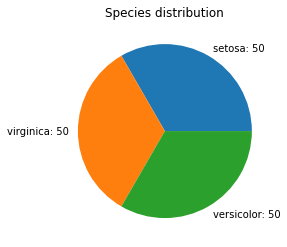

In [9]:
species_distribution_labelled = plt.pie(
    iris.species.value_counts(), 
    labels= {f'{k}: {v}' for k, v in iris.species.value_counts().items()}
)
plt.title('Species distribution')

#### Точкова диаграма

За репрезентация на съотношението между две количествени променливи, особено чест метод е точковата диаграма (scatterplot). Най-лесният начин за създаване е чрез метода scatter() и двете количествени променливи като аргументи. Точковата диаграма чертае всеки случай от набора според двата атрибута. Така получаваме визуална репрезентация на съотношението на двата признака. Както виждаме долу, дължината на близалцето се увеличава дължината на листа.  

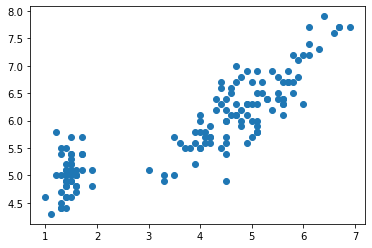

In [10]:
scatterplot = plt.scatter(iris.petal_length, iris.sepal_length)

Също така, можем да дадем низове с имената на променливите и да зададем откъде да бъдат взети чрез аргумента data.

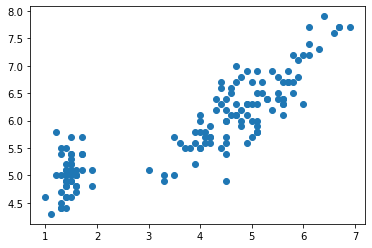

In [11]:
scatterplot = plt.scatter('petal_length','sepal_length', data=iris)

#### Линейна диаграма

Подобно на точковата диаграма, линейната диаграма отразява съотношението между две колчиествени променливи в двуизмерно поле. Основната разлика е че тя използва линия наместо точки. За да начертаем линия в matplotlib, използваме функцията plot. Тъй като линия, минаваща през всичките точки на точковата ни диаграма ще изглежда грозно, за пример ще направим проста синусоидна функция, където y = sin(x). 

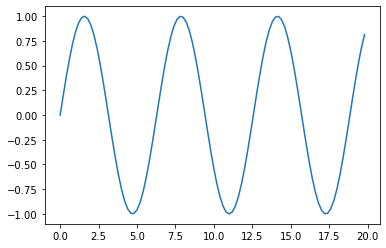

In [12]:
import numpy as np 
# Ще научим повече за библиотеката numpy по-нататък,
# засега тя ни позволява да приложим синусоидна функция върху х.

x = np.array(range(100))
x = x/5 # разделяме x на 5, за да имаме по-висока "резолюция" с пет точки за всяка единица
y = np.sin(x)
sine_plot = plt.plot(x, y)

#### Стълбова Диаграма

Стълбовата диаграма (bar chart) е друг основен метод за илюстриране на данни. Тя се създава чрез функцията bar. В долния пример сме взели за х-ос индивидуалните години, докато за у-ос изчисляваме бюджета за всичките 6 държави, групиран по години.

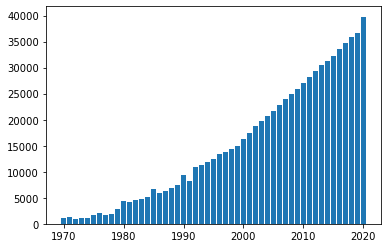

In [13]:
years = healthexp.Year.unique()
usd_spending_per_year = healthexp.groupby('Year').Spending_USD.sum()
spending_per_year_bars = plt.bar(years, usd_spending_per_year)

Нека сега начертаем бюджетите на 6-те държави за 2020.

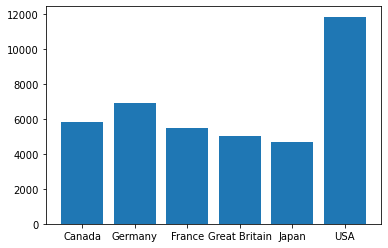

In [14]:
healthexp_2020 = healthexp[healthexp.Year == 2020]
countries = healthexp_2020.Country.unique()
country_budgets = healthexp_2020.Spending_USD 
#няма нужда да агрегираме, тъй като в набора данни имаме само по една стойност за държава за година
country_budget_bars = plt.bar(countries, country_budgets)

Нека проверим дали даннните ни са верни, като проверим бюджета на Щатите за 2020:

In [15]:
healthexp[
    (healthexp.Year == 2020)
    &(healthexp.Country == 'USA')
].Spending_USD

273    11859.179
Name: Spending_USD, dtype: float64

### Задача

Вземете променливите от упражнения 3 и 4 и подкрепете докладите си с подходящи визуализации.